<style>div.container { width: 100% }</style>
<img style="float:left;  vertical-align:text-bottom;" height="65" width="172" src="https://raw.githubusercontent.com/holoviz/holoviz/master/doc/_static/holoviz-logo-unstacked.svg" />
<div style="float:right; vertical-align:text-bottom;"><h2>Tutorial 2. Plotting</h2></div>

When trying to make sense of data, there are many representations to choose from, including data tables, textual summaries and so on. We'll mostly focus on plotting data to get an intuitive visual representation, using a simple but powerful plotting API.

If you have tried to visualize a `pandas.DataFrame` before, then you have likely encountered the [Pandas .plot() API](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). These plotting commands use [Matplotlib](http://matplotlib.org) to render static PNGs or SVGs in a Jupyter notebook using the `inline` backend, or interactive figures via `%matplotlib widget`, with a command that can be as simple as `df.plot()` for a DataFrame with one or two columns. 

The Pandas .plot() API has emerged as a de-facto standard for high-level plotting APIs in Python, and is now supported by many different libraries that use various underlying plotting engines to provide additional power and flexibility. Learning this API allows you to access capabilities provided by a wide variety of underlying tools, with relatively little additional effort. The libraries currently supporting this API include:

- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) -- Matplotlib-based API included with Pandas. Static or interactive output in Jupyter notebooks.
- [xarray](https://xarray.pydata.org/en/stable/plotting.html) -- Matplotlib-based API included with xarray, based on pandas .plot API. Static or interactive output in Jupyter notebooks.
- [hvPlot](https://hvplot.pyviz.org) -- HoloViews and Bokeh-based interactive plots for Pandas, GeoPandas, xarray, Dask, Intake, and Streamz data.
- [Pandas Bokeh](https://github.com/PatrikHlobil/Pandas-Bokeh) -- Bokeh-based interactive plots, for Pandas, GeoPandas, and PySpark data.
- [Cufflinks](https://github.com/santosjorge/cufflinks) -- Plotly-based interactive plots for Pandas data.
- [Plotly Express](https://plotly.com/python/pandas-backend) -- Plotly-Express-based interactive plots for Pandas data; only partial support for the .plot API keywords.
- [PdVega](https://altair-viz.github.io/pdvega) -- Vega-lite-based, JSON-encoded interactive plots for Pandas data.

In this notebook we'll explore what is possible with the default `.plot` API and demonstrate the additional capabilities provided by `.hvplot`. 

### Import and configure packages

Please note that in **Colab** you will need to `!pip install panel hvplot`.

In [29]:
# !pip install panel==0.12.6 hvplot==0.7.3

In [64]:
import hvplot.pandas
import panel as pn

### Read in the data

Here we will focus on Pandas, but a similar approach will work for any supported DataFrame type, including Dask for distributed computing or RAPIDS cuDF for GPU computing. This dataset is relatively large (2.1 million rows), but should still fit into memory on any recent machine, and thus won't need special out-of-core or distributed approaches like Dask provides.

In [43]:
from bokeh.sampledata.autompg import autompg_clean as df
# you may also read in data from a local file, for example using
# df = pd.read_csv('data.csv')

In [41]:
len(df)

392

In [39]:
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford


In [37]:
df.tail()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
387,27.0,4,140.0,86,2790,15.6,82,North America,ford mustang gl,ford
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup,volkswagen
389,32.0,4,135.0,84,2295,11.6,82,North America,dodge rampage,dodge
390,28.0,4,120.0,79,2625,18.6,82,North America,ford ranger,ford
391,31.0,4,119.0,82,2720,19.4,82,North America,chevy s-10,chevrolet


In [42]:
df.describe()

,mpg,cyl,displ,hp,weight,accel,yr
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Using Pandas `.plot()`

The first thing that we'd like to do with this data is visualize two features of the dataset: mpg and hp. So we would like to make a scatter or points plot where _x_ is mpg and _y_ is hp. 

We can do that for the smaller dataframe using the `pandas.plot` API and Matplotlib:

<AxesSubplot:xlabel='mpg', ylabel='hp'>

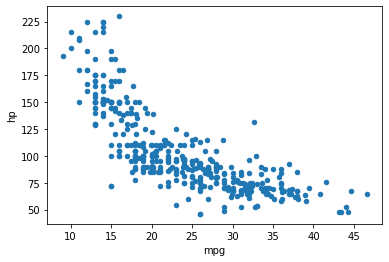

In [34]:
df.plot.scatter(x='mpg', y='hp')

### Using .hvplot
As you can see above, the Pandas API gives you a usable plot very easily. You can make a very similar plot with the same arguments using hvplot, after importing hvplot.pandas to install hvPlot support into Pandas:

In [47]:
import hvplot.pandas 

In [48]:
df.hvplot.scatter(x='mpg', y='hp')

:Scatter   [mpg]   (hp)

Here unlike in the Pandas .plot() there is a default hover action on the datapoints to show the values, and you can always pan and zoom to focus on any particular region of the data of interest.



#### Exercise

Try changing the x axis on the plot above to see the relationship between weight and hp. 
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
df.hvplot.scatter(x='weight', y='hp')
```

</details>

### Getting help with hvplot options

You may be wondering how you can learn about all the options that are available with `hvplot`. For this purpose, you can use tab-completion in the Jupyter notebook or the `hvplot.help` function which are documented in the [user guide](https://hvplot.holoviz.org/user_guide/Customization.html).

For tab completion, you can press tab after the opening parenthesis in a `obj.hvplot.<kind>(` call. For instance, you can try pressing tab after the partial expression `df.hvplot.scatter(<TAB>`.

Alternatively, you can call `hvplot.help(<kind>)` to see a documentation pane pop up in the notebook. Try uncommenting the following line and executing it:

In [59]:
hvplot.help('scatter')


Scatter plot

Parameters
----------
x, y : string, optional
    Field name to draw x- and y-positions from
c: string, optional
    Name of the field to color points by
s: string, optional
    Name of the field to scale point size by
scale: number, optional
    Scaling factor to apply to point scaling
**kwds : optional
    Keyword arguments to pass on to
    :py:meth:`hvplot.converter.HoloViewsConverter`.
Returns
-------
obj : HoloViews object
    The HoloViews representation of the plot.


Generic options
---------------
clim: tuple
    Lower and upper bound of the color scale
cnorm (default='linear'): str
    Color scaling which must be one of 'linear', 'log' or 'eq_hist'
colorbar (default=False): boolean
    Enables a colorbar
fontscale: number
    Scales the size of all fonts by the same amount, e.g. fontscale=1.5
    enlarges all fonts (title, xticks, labels etc.) by 50%
fontsize: number or dict
    Set title, label and legend text to the same fontsize. Finer control
    by using 

You will see there are a lot of options!  You can control which section of the documentation you view with the `generic`, `docstring` and `style` boolean switches also documented in the  [user guide](https://hvplot.holoviz.org/user_guide/Customization.html). If you run the following cell, you will see that `alpha` is listed in the 'Style options'.

In [60]:
hvplot.help('scatter', style=True, generic=False)


Scatter plot

Parameters
----------
x, y : string, optional
    Field name to draw x- and y-positions from
c: string, optional
    Name of the field to color points by
s: string, optional
    Name of the field to scale point size by
scale: number, optional
    Scaling factor to apply to point scaling
**kwds : optional
    Keyword arguments to pass on to
    :py:meth:`hvplot.converter.HoloViewsConverter`.
Returns
-------
obj : HoloViews object
    The HoloViews representation of the plot.

Style options
-------------

alpha
angle
cmap
color
fill_alpha
fill_color
hover_alpha
hover_color
hover_fill_alpha
hover_fill_color
hover_line_alpha
hover_line_color
line_alpha
line_cap
line_color
line_dash
line_join
line_width
marker
muted_alpha
muted_color
muted_fill_alpha
muted_fill_color
muted_line_alpha
muted_line_color
nonselection_alpha
nonselection_color
nonselection_fill_alpha
nonselection_fill_color
nonselection_line_alpha
nonselection_line_color
palette
selection_alpha
selection_color
sele

In [65]:
PALETTE = ["#ff6f69", "#ffcc5c", "#88d8b0", ]
pn.Row(
    pn.layout.HSpacer(height=50, background=PALETTE[0]),
    pn.layout.HSpacer(height=50, background=PALETTE[1]),
    pn.layout.HSpacer(height=50, background=PALETTE[2]),
)

Row
    [0] HSpacer(background='#ff6f69', height=50)
    [1] HSpacer(background='#ffcc5c', height=50)
    [2] HSpacer(background='#88d8b0', height=50)

#### Exercise

Try changing color, width, height, and alpha value of the plot. 
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
df.hvplot.scatter(
    x='mpg', 
    y='hp',
    color=PALETTE,
    width=600,
    height=300,
    alpha=0.5
)
```

</details>

In [83]:
df.hvplot.hist('mpg', bins=10)

:Histogram   [mpg]   (mpg_count)

#### Exercise

Create a kernel density estimate (kde) plot of mpg for `df`:
<details><summary><i><u>(Solution)</u><i></summary><br>

```python
df.hvplot.kde('mpg')
```

</details>

In [82]:
df.hvplot.kde('mpg')

:Distribution   [mpg]   (Density)

In [94]:
df.hp.isna().value_counts()

False    392
Name: hp, dtype: int64

In [84]:
df.hvplot.hexbin(x='mpg', y='hp')

:HexTiles   [mpg,hp]

#### Grouping

We can overlay all our groups on the same plot using the `by` option:

In [87]:
df.hvplot.scatter(x='mpg', y='hp', by='origin')

:NdOverlay   [origin]
   :Scatter   [mpg]   (hp)

#### Exercise

Add `subplots=True` and `width=300` to see the different classes side-by-side instead of overlaid. The axes will be linked, so try zooming.

<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
df.hvplot.scatter(
    x='mpg', 
    y='hp', 
    by='origin',
    subplots=True,
    width=300
    )
```

</details>

What if you want a single plot, but want to see each class separately? You can use the `groupby` option to get a widget for toggling between classes, here in a bivariate plot (using a subset of the data as bivariate plots can be expensive to compute):

In [86]:
df.hvplot.scatter(x='mpg', y='hp', groupby='origin')

:DynamicMap   [origin]
   :Scatter   [mpg]   (hp)

# Exploring further

As you can see, hvPlot makes it simple to explore your data interactively, with commands based on the widely used Pandas `.plot()` API but now supporting many more features and different types of data. The visualizations above just touch the surface of what is available from hvPlot, and you can explore the [hvPlot website](https://hvplot.pyviz.org) to see much more, or just explore it yourself using tab completion (`df.hvplot.`_[TAB]_). The following section will focus on how to put these plots together once you have them, linking them to understand and show their structure.